### This Notebook plots the MOTA and MOTP metrics for synthetic data generated by the `simulation_tracking.py` script.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import os
import matplotlib
from pathlib import Path
import pandas as pd
import re
from pathlib import Path

### Function Definitions

In [193]:
def create_noise_level_plot(sim_type, snr_levels, run_folder, plot_folder, frame_num=150):
    fig, axs = plt.subplots(3, len(snr_levels), figsize=(8, 4))

    colormap = plt.cm.tab20
    
    # Load and plot specific frame for each noise level
    for i, snr in enumerate(snr_levels):
        # Load only frame 150 from RAW data
        raw_path = f"{run_folder}/{sim_type}_snr_{snr}/00_GT/RAW"
        gt_path = f"{run_folder}/{sim_type}_snr_{snr}/00_GT/TRA"
        tracked_path = f"{run_folder}/{sim_type}_snr_{snr}/00_RES"
        raw_files = sorted([f for f in os.listdir(raw_path) if f.endswith('.tif')])
        gt_files = sorted([f for f in os.listdir(gt_path) if f.endswith('.tif')])
        tracked_files = sorted([f for f in os.listdir(tracked_path) if f.endswith('.tif')])
        frame_file = raw_files[frame_num]
        raw_array = io.imread(os.path.join(raw_path, frame_file))

        frame_file = gt_files[frame_num]
        gt_array = io.imread(os.path.join(gt_path, frame_file))

        frame_file = tracked_files[frame_num]
        tracked_array = io.imread(os.path.join(tracked_path, frame_file))
        
        # Normalize RAW data
        raw_norm = (raw_array - raw_array.min()) / (raw_array.max() - raw_array.min())
        max_val = max(tracked_array.max(), gt_array.max())

        # Create random color mapping with tab20 colormap for every value up to max_val
        np.random.seed(0)
        mapping = np.random.choice(np.arange(0, 20), max_val + 1)
        mapping = np.asarray(colormap.colors)[mapping.flatten().astype(int)]

        mapping = np.insert(mapping, 0, [1, 1, 1], axis=0)

        custom_cmap = matplotlib.colors.ListedColormap(mapping)
        
        # Plot RAW data
        axs[0, i].imshow(raw_norm, cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
        axs[1, i].imshow(gt_array, cmap=custom_cmap, interpolation='nearest', vmin=0, vmax=max_val)
        axs[2, i].imshow(tracked_array, cmap=custom_cmap, interpolation='nearest', vmin=0, vmax=max_val)
        
        # Set title and disable ticks
        axs[0, i].set_title(f'SNR {snr.split(".")[0]} dB')
    

    # Set row labels
    row_labels = ['Raw Data', 'Ground Truth', 'Tracking Result']
    for i, label in enumerate(row_labels):
        axs[i, 0].set_ylabel(label, rotation=90, labelpad=10)


    for ax_flat in axs.flatten():
        ax_flat.tick_params(axis='both', which='both', bottom=False, top=False,
                            labelbottom=False, right=False, left=False, labelleft=False)
            
        # Set spine width
        for spine in ax_flat.spines.values():
            spine.set_linewidth(1)
    
    plt.tight_layout()

    # plot the colorbar
    fig.subplots_adjust(right=0.8)
    # Create a ScalarMappable for the raw data (viridis colormap)
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=1))
    sm.set_array([])  # This line is important to ensure the colorbar works correctly

    # Add colorbar
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    cbar = fig.colorbar(sm, cax=cbar_ax)

    # Set appropriate ticks and labels
    cbar.set_ticks([0, 0.5, 1])
    cbar.set_ticklabels(['0', '0.5', '1'])
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label('Normalized Intensity', rotation=90, labelpad=10, fontsize=12)

    # Save the plot
    output_path = os.path.join(plot_folder, f'{sim_type}_noise_levels_frame_{frame_num}.svg')
    plt.savefig(output_path, dpi=150, bbox_inches='tight')


def create_single_simulation_plot(sim_type, sim_name, run_folder, plot_folder, frames):
    # Create figure with 3 rows and len(frames) columns
    _ , axs = plt.subplots(3, len(frames), figsize=(5, 4))
    
    colormap = plt.cm.tab20
    
    # Load paths for SNR infinity
    raw_path = f"{run_folder}/{sim_type}_snr_inf/00_GT/RAW"
    gt_path = f"{run_folder}/{sim_type}_snr_inf/00_GT/TRA"
    tracked_path = f"{run_folder}/{sim_type}_snr_inf/00_RES"
    
    raw_files = sorted([f for f in os.listdir(raw_path) if f.endswith('.tif')])
    gt_files = sorted([f for f in os.listdir(gt_path) if f.endswith('.tif')])
    tracked_files = sorted([f for f in os.listdir(tracked_path) if f.endswith('.tif')])
    
    for frame_idx, frame_num in enumerate(frames):
        # Load frame data
        raw_array = io.imread(os.path.join(raw_path, raw_files[frame_num]))
        gt_array = io.imread(os.path.join(gt_path, gt_files[frame_num]))
        tracked_array = io.imread(os.path.join(tracked_path, tracked_files[frame_num]))
        
        # Normalize RAW data
        raw_norm = (raw_array - raw_array.min()) / (raw_array.max() - raw_array.min())
        
        # Create color mapping
        max_val = max(tracked_array.max(), gt_array.max())
        np.random.seed(0)
        mapping = np.random.choice(np.arange(0, 20), max_val + 1)
        mapping = np.asarray(colormap.colors)[mapping.flatten().astype(int)]
        mapping = np.insert(mapping, 0, [1, 1, 1], axis=0)
        custom_cmap = matplotlib.colors.ListedColormap(mapping)
        
        # Plot data
        axs[0, frame_idx].imshow(raw_norm, cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
        axs[1, frame_idx].imshow(gt_array, cmap=custom_cmap, interpolation='nearest', vmin=0, vmax=max_val)
        axs[2, frame_idx].imshow(tracked_array, cmap=custom_cmap, interpolation='nearest', vmin=0, vmax=max_val)
        
        # Set title for top row
        axs[0, frame_idx].set_title(f't={frame_num}')
    
    # Set row labels
    row_labels = ['Raw Data', 'Ground Truth', 'Tracking Result']
    for i, label in enumerate(row_labels):
        axs[i, 0].set_ylabel(label, rotation=90, labelpad=10)
    
    # Remove ticks and set spine width for all subplots
    for ax_row in axs:
        for ax in ax_row:
            ax.tick_params(axis='both', which='both', bottom=False, top=False,
                          labelbottom=False, right=False, left=False, labelleft=False)
            for spine in ax.spines.values():
                spine.set_linewidth(1)
    
    plt.suptitle(sim_name, y=1.02)
    plt.tight_layout()
    
    # Save the plot
    os.makedirs(os.path.join(run_folder, 'plots'), exist_ok=True)
    output_path = os.path.join(run_folder, 'plots', f'{sim_type}_frames_comparison.svg')
    plt.savefig(output_path, dpi=150, bbox_inches='tight')

def print_tree(path, prefix='', show_files=False, depth=None, current_depth=0):
    if not isinstance(path, Path):
        path = Path(path)

    if depth is not None and current_depth > depth:
        return

    for item in path.iterdir():
        if item.is_dir():
            print(f'{prefix}├── {item.name}/')
            print_tree(item, prefix + '│   ', show_files, depth, current_depth + 1)
        elif show_files:
            print(f'{prefix}├── {item.name}')

def load_summaries(base_path, data_file_name):
    base_path = Path(base_path)
    summary_data = []

    pattern = re.compile(r'sim_(chaotic|circles|directional|target_pattern)_snr_([\-]?[0-9]+(?:\.[0-9]*)?|inf)')

    for folder in base_path.iterdir():
        if folder.is_dir():
            match = pattern.match(folder.name)
            if match:
                sim_type, snr = match.groups()
                summary_file = Path(os.path.join(folder, data_file_name))
                if summary_file.exists():
                    df = pd.read_csv(summary_file)
                    df['snr'] = float(snr) if snr != 'inf' else float('inf')
                    df['sim_type'] = sim_type
                    df = df.rename(columns={'Unnamed: 0': 'sequence'})
                    summary_data.append(df)

    combined_df = pd.concat(summary_data, ignore_index=True)
    
    return combined_df

These are the Metrics available in the MOTA package, of which a selection is calculated previuosly in the evaluation of the tracking algorithm.

| Name                  | Description                                                                         |
|-----------------------|-------------------------------------------------------------------------------------|
| num_frames            | Total number of frames.                                                             |
| num_matches           | Total number matches.                                                               |
| num_switches          | Total number of track switches.                                                     |
| num_false_positives   | Total number of false positives (false-alarms).                                      |
| num_misses            | Total number of misses.                                                             |
| num_detections        | Total number of detected objects including matches and switches.                    |
| num_objects           | Total number of unique object appearances over all frames.                          |
| num_predictions       | Total number of unique prediction appearances over all frames.                      |
| num_unique_objects    | Total number of unique object ids encountered.                                       |
| mostly_tracked        | Number of objects tracked for at least 80 percent of lifespan.                      |
| partially_tracked     | Number of objects tracked between 20 and 80 percent of lifespan.                    |
| mostly_lost           | Number of objects tracked less than 20 percent of lifespan.                         |
| num_fragmentations    | Total number of switches from tracked to not tracked.                               |
| motp                  | Multiple object tracker precision.                                                  |
| mota                  | Multiple object tracker accuracy.                                                   |
| precision             | Number of detected objects over sum of detected and false positives.                |
| recall                | Number of detections over number of objects.                                        |
| idfp                  | ID measures: Number of false positive matches after global min-cost matching.       |
| idfn                  | ID measures: Number of false negatives matches after global min-cost matching.      |
| idtp                  | ID measures: Number of true positives matches after global min-cost matching.       |
| idp                   | ID measures: global min-cost precision.                                             |
| idr                   | ID measures: global min-cost recall.                                                |
| idf1                  | ID measures: global min-cost F1 score.                                              |
| obj_frequencies       | `pd.Series`: Total number of occurrences of individual objects over all frames.     |
| pred_frequencies      | `pd.Series`: Total number of occurrences of individual predictions over all frames.  |
| track_ratios          | `pd.Series`: Ratio of assigned to total appearance count per unique object id.      |
| id_global_assignment  | `dict`: ID measures: Global min-cost assignment for ID measures.                    |
| deta_alpha            | HOTA: Detection Accuracy (DetA) for a given threshold.                              |
| assa_alpha            | HOTA: Association Accuracy (AssA) for a given threshold.                            |
| hota_alpha            | HOTA: Higher Order Tracking Accuracy (HOTA) for a given threshold.                  |


# Define Input and output directories

In [113]:
RUN_FOLDER = 'evaluation_arcospx_run001/'
PLOT_FOLDER = os.path.join(RUN_FOLDER, 'plots')
DATA_FILE_NAME = "summary_bbox_05iou.csv"
os.makedirs(PLOT_FOLDER, exist_ok=True)

    
plt.rcParams.update({
    'svg.fonttype': 'none',
    'font.style': 'normal',
    'font.size': 8,
    'font.family': 'Arial'
})

In [105]:
print_tree(RUN_FOLDER, show_files=False, depth=0)

├── sim_target_pattern_snr_inf/
├── sim_directional_snr_-10.0/
├── sim_circles_snr_-10.0/
├── sim_chaotic_snr_25.0/
├── sim_directional_snr_-5.0/
├── sim_circles_snr_inf/
├── sim_chaotic_snr_inf/
├── sim_target_pattern_snr_-15.0/
├── logs/
├── sim_circles_snr_-5.0/
├── sim_chaotic_snr_-10.0/
├── sim_directional_snr_0.0/
├── sim_target_pattern_snr_25.0/
├── plots/
├── sim_directional_snr_inf/
├── sim_chaotic_snr_-15.0/
├── sim_target_pattern_snr_-5.0/
├── sim_circles_snr_25.0/
├── sim_directional_snr_-15.0/
├── sim_circles_snr_-15.0/
├── sim_chaotic_snr_0.0/
├── sim_chaotic_snr_-5.0/
├── sim_directional_snr_25.0/
├── sim_target_pattern_snr_0.0/
├── sim_target_pattern_snr_-10.0/
├── sim_circles_snr_0.0/


### Plot Overview of individual simulations

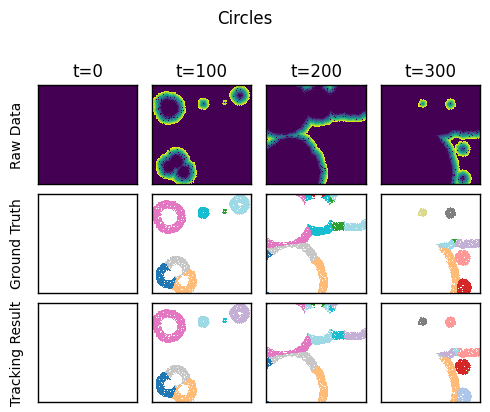

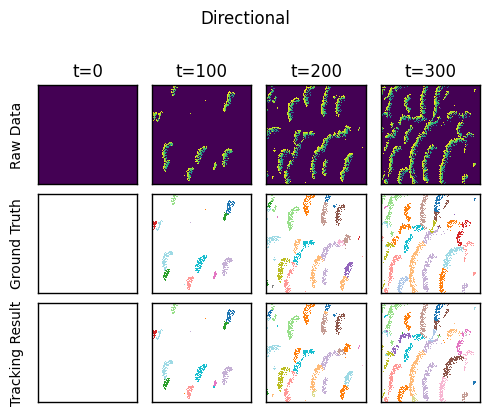

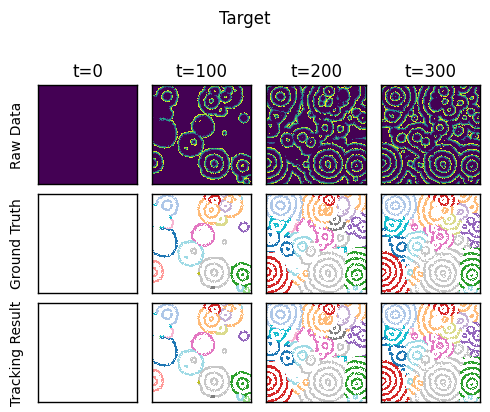

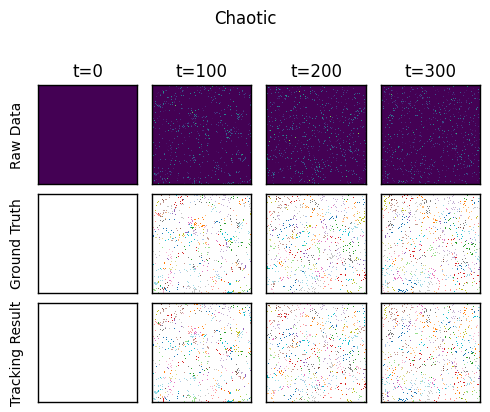

In [109]:
# set default theme
plt.style.use('default')

# Define simulation types and their display names
sim_types = ['sim_circles', 'sim_directional', 'sim_target_pattern', 'sim_chaotic']
sim_names = ['Circles', 'Directional', 'Target', 'Chaotic']
frames = [0, 100, 200, 300]

for sim_type, sim_name in zip(sim_types, sim_names):
    create_single_simulation_plot(sim_type, sim_name, RUN_FOLDER, PLOT_FOLDER, frames)
    plt.show()

### Plot overview pannels for signal degradation

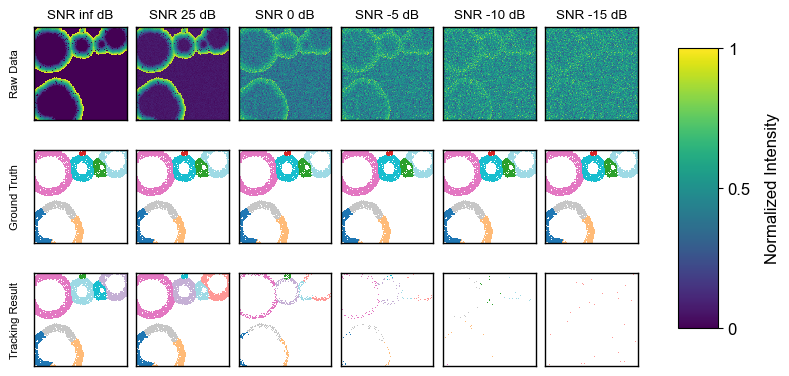

In [107]:
# Define noise levels to plot
snr_levels = ['inf', '25.0', '0.0', '-5.0', '-10.0', '-15.0']
sim_type = 'sim_circles'
# Run the noise level plot
RUN_FOLDER = "evaluation_arcospx_run001"
create_noise_level_plot(sim_type, snr_levels, RUN_FOLDER, PLOT_FOLDER)
plt.show()

### Load CSV data generated by py-motmetrics

In [194]:
df_mota = load_summaries(RUN_FOLDER, DATA_FILE_NAME)
df_mota['False Positives'] = df_mota['num_false_positives'] / df_mota['num_objects'] * 100
df_mota['Switches'] = df_mota['num_switches'] / df_mota['num_objects'] * 100
df_mota['Misses'] = df_mota['num_misses'] / df_mota['num_objects'] * 100
df_mota.rename(columns={'num_objects': 'Objects', 'mota': 'MOTA (higher is better)', 'motp': 'MOTP (lower is better)', 'precision': 'Precision (higher is better)', 'recall': 'Recall (higher is better)'}, inplace=True)

In [176]:
# Melt the dataframe to make it suitable for seaborn's barplot
df = pd.melt(df_mota, id_vars=['sim_type', 'snr'], value_vars=['MOTA (higher is better)', 'MOTP (lower is better)', 'Precision (higher is better)', 'Recall (higher is better)', 'False Positives', 'Switches', 'Misses'],
                    var_name='Metric', value_name='Value')

C:\Users\benig\AppData\Local\Temp\ipykernel_27024\2958086149.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mean = df_filtered.groupby(['Metric', 'sim_type', 'snr_str']).mean().reset_index()


hmm


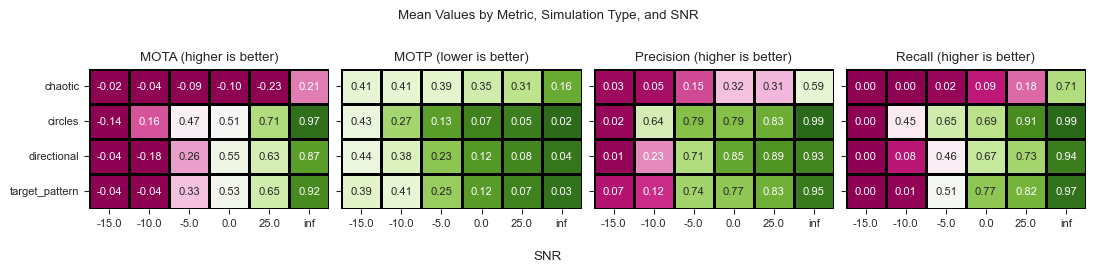

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# select only MOTA, MOTP, precision, and recall
df_filtered = df[df['Metric'].isin(['MOTA (higher is better)', 'MOTP (lower is better)', 'Precision (higher is better)', 'Recall (higher is better)'])].copy()

df_filtered['snr'] = df_filtered['snr'].replace('inf', np.inf)
df_filtered['snr'] = pd.to_numeric(df_filtered['snr'], errors='coerce')
df_filtered['snr_str'] = df_filtered['snr'].apply(lambda x: 'inf' if np.isinf(x) else str(x))

snr_order_numeric = df_filtered['snr'].drop_duplicates().sort_values()
snr_order = [str(s) if not np.isinf(s) else 'inf' for s in snr_order_numeric]
df_filtered['snr_str'] = pd.Categorical(df_filtered['snr_str'], categories=snr_order, ordered=True)

# Compute mean values
df_mean = df_filtered.groupby(['Metric', 'sim_type', 'snr_str']).mean().reset_index()

def custom_heatmap(data, **kwargs):
    if data['Metric'].iloc[0] != 'MOTP (lower is better)':
        cmap = 'PiYG'
    else:
        # invert PiYG colormap for motp
        cmap = 'PiYG_r'

    # Pivot the data
    pivot_table = data.pivot(index='sim_type', columns='snr_str', values='Value')
    
    # Create the heatmap
    sns.heatmap(
        pivot_table,
        vmin=0,
        vmax=1,
        annot=True,
        fmt=".2f",
        cmap=cmap,
        linecolor='black',
        linewidth=1,
        cbar=False,
        **kwargs
    )

# Create the FacetGrid
g = sns.FacetGrid(
    df_mean,
    col='Metric',
    col_wrap=4,  # Adjust as needed
    height=2.5,
    aspect=1.1,
    despine=False,
)

# Create a colorbar axis
fig = g.figure
axes = g.axes.flatten()

# Map the custom plotting function
for ax, (_, data) in zip(axes, df_mean.groupby('Metric')):
    if data['Metric'].iloc[0] == 'MOTP (lower is better)':
        print('hmm')
        data['Value'] = data['Value']
        metric_name = 'MOTP (lower is better)'
    else:
        metric_name = data['Metric'].iloc[0]
    custom_heatmap(data, ax=ax)
    ax.set_title(metric_name)
    ax.set_xlabel(None)
    ax.set_ylabel(None)


fig.suptitle('Mean Values by Metric, Simulation Type, and SNR', y=1.02)

fig.supxlabel('SNR')

# Adjust layout
plt.tight_layout()
plt.savefig(f'{RUN_FOLDER}/plots/heatmap_mean_values_dark.svg', dpi=300)
plt.show()


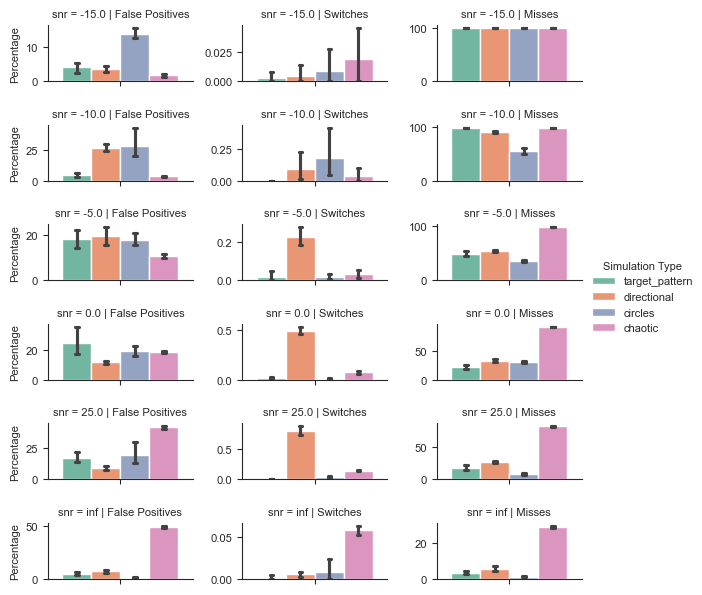

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df_filtered_relative = df[df['Metric'].isin(['False Positives', 'Misses', 'Switches'])].copy()
g = sns.catplot(data=df_filtered_relative, col='Metric', row='snr', y='Value', hue='sim_type', palette='Set2', kind='bar', dodge=True, errorbar='ci', capsize=0.1, sharey=False, height=1, aspect=2)
g.set_ylabels('Percentage')
g.set_titles(col_template="{col_name}")
g.legend.set_title('Simulation Type')
plt.show()


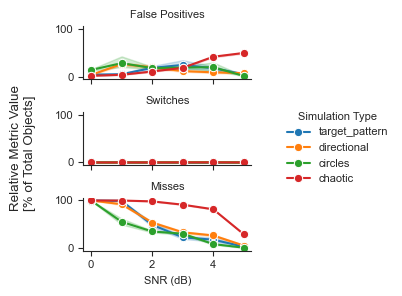

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 8,
    'svg.fonttype': 'none',
    'font.style': 'normal',
})

# Create mapping of SNR values to numeric order (removing duplicates)
snr_unique = sorted(list(set([x for x in df_filtered_relative['snr'].unique() if x != 'inf'])))
snr_map = {snr: idx for idx, snr in enumerate(snr_unique)}

# Create new numeric column for plotting
df_filtered_relative['snr_order'] = df_filtered_relative['snr'].map(snr_map)

# Create simple figure with clean style
sns.set_style("ticks")
plt.rcParams['font.family'] = 'Arial'

# Create the facet grid
g = sns.FacetGrid(
    df_filtered_relative,
    row='Metric',
    sharey=True,
    height=1,
    aspect=1.5
)

# Create the line plots
g.map_dataframe(
    sns.lineplot,
    x='snr_order',
    y='Value',
    hue='sim_type',
    marker='o'
)

g.set_titles("{row_name}")

# Add legend and labels
g.add_legend(title='Simulation Type', bbox_to_anchor=(1.05, 0.5), loc='center left')
g.set_axis_labels('SNR (dB)', '')

# Set supylabel
g.figure.supylabel('Relative Metric Value\n[% of Total Objects]')

# Adjust layout
plt.tight_layout()
plt.savefig(f'{RUN_FOLDER}/plots/line_plot_relative.svg', dpi=300)
plt.show()